# Superstore Sales Analysis

## Insights Summary

1. **Top-Performing Categories:**
   - The 'Technology' category had the **highest sales and profit**.
   - 'Furniture' had decent sales but significantly lower profit margins.

2. **Sub-Category Performance:**
   - Sub-categories like 'Copiers' and 'Phones' were highly profitable.
   - **'Tables' incurred losses** despite moderate sales — likely due to high discounts or return rates.

3. **Regional Analysis:**
   - The **West and East** regions were the most profitable.
   - The **Central region had the lowest profitability**, suggesting potential operational inefficiencies or lower market share.

4. **Customer Segment Distribution:**
   - Most customers belonged to the **Consumer segment**, followed by Corporate.
   - This shows a strong B2C focus for the business.

5. **Discount vs Profit Correlation:**
   - As discounts increased, profits **decreased sharply** — especially in the 'Furniture' category.
   - Excessive discounting seems to **negatively impact profitability**, especially on low-margin items.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [10]:
df = pd.read_csv('C:/SampleSuperstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [16]:
df = df.drop(['Postal Code'], axis=1)

In [17]:
df.columns = df.columns.str.replace(' ', '_')

In [18]:
df.describe()

,Row_ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


## Sales and Profit by Category:

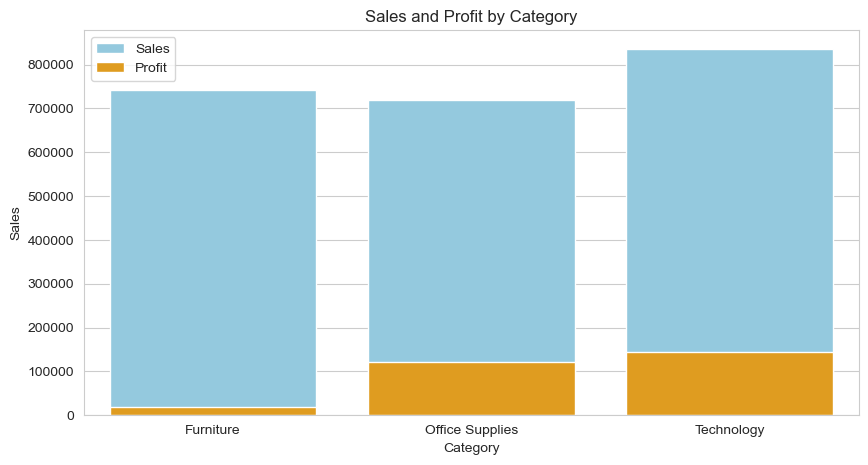

In [20]:
category_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
sns.barplot(x='Category', y='Sales', data=category_profit, color='skyblue', label='Sales')
sns.barplot(x='Category', y='Profit', data=category_profit, color='orange', label='Profit')
plt.title('Sales and Profit by Category')
plt.legend()
plt.show()

## Profit by Region:

C:\Users\Sakshi Katiyar\AppData\Local\Temp\ipykernel_20460\3245053329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_perf, palette='Set2')


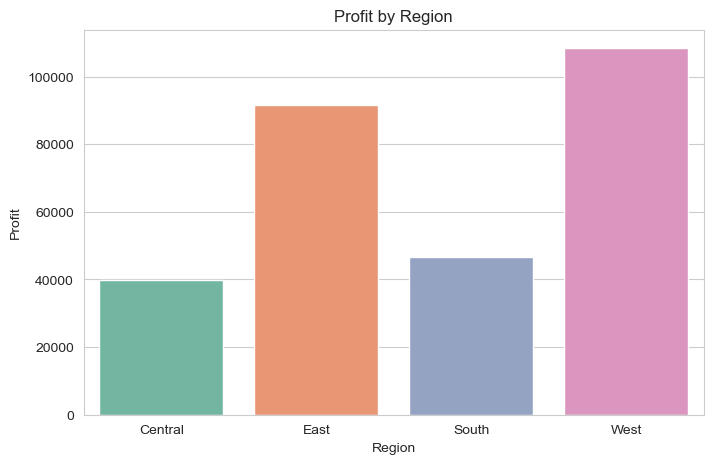

In [21]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=region_perf, palette='Set2')
plt.title('Profit by Region')
plt.show()

## Category-region combination:

<Axes: xlabel='Category', ylabel='Region'>

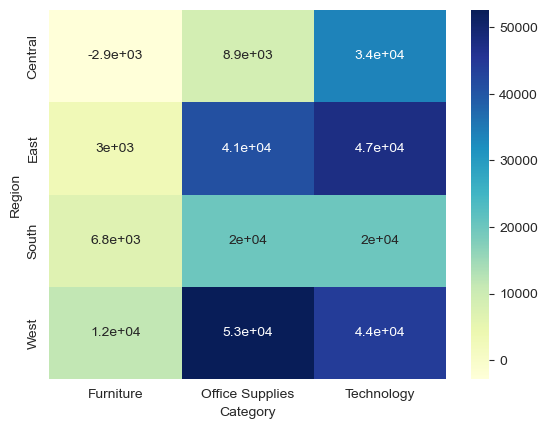

In [22]:
sns.heatmap(df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum'), annot=True, cmap='YlGnBu')

## Sales Count by Customer Segment:

C:\Users\Sakshi Katiyar\AppData\Local\Temp\ipykernel_20460\3043177274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='viridis')


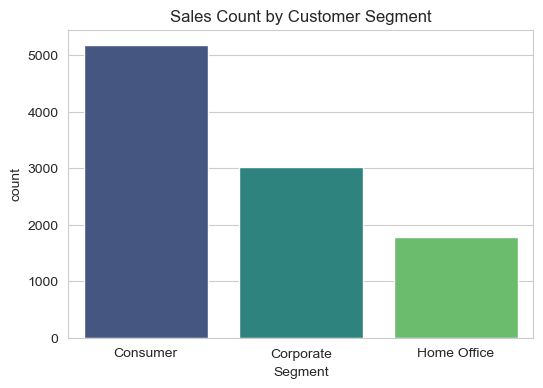

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', data=df, palette='viridis')
plt.title('Sales Count by Customer Segment')
plt.show()

## Discount vs Profit:

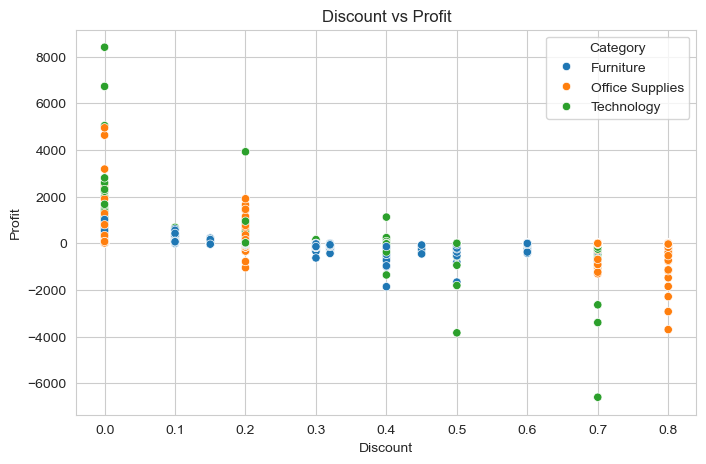

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category')
plt.title('Discount vs Profit')
plt.show()

## Recommendations:
- Investigate loss-making sub-categories like 'Tables' for pricing or supplier issues.
- Focus more marketing on 'Technology' & 'Office Supplies' where profit margins are healthy.
- Reevaluate discounting strategy — aim to offer value without deep profit cuts.